In [34]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Feature Manipulation

(Problem 5. Feature Manipulation)

In [4]:
pd.set_option('display.max_columns', None)
asthma_dataset = pd.read_csv('../data/asthma_disease_data.csv')
asthma_dataset.head(10)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
5,5039,21,0,2,0,21.812975,0,0.470044,1.759118,9.549262,1.711446,7.192424,6.832048,1,0,0,1,0,0,2.328191,5.898515,1,0,1,0,0,1,0,Dr_Confid
6,5040,45,1,1,1,30.245954,1,9.371784,7.030507,5.746128,7.664306,5.046500,8.918884,0,0,0,0,0,0,2.995100,1.701512,1,1,1,0,0,0,0,Dr_Confid
7,5041,26,0,0,1,26.048416,1,8.344096,1.626484,6.431179,6.939046,8.417881,2.190541,0,0,0,1,0,0,2.069343,4.012260,1,0,0,1,1,1,0,Dr_Confid
8,5042,49,1,1,2,32.676204,0,2.690256,3.920034,5.843645,3.180421,7.292903,8.568676,1,0,0,0,0,1,1.761242,5.190931,1,1,1,1,0,0,0,Dr_Confid
9,5043,45,1,1,1,29.910298,0,2.895720,2.607700,7.234908,1.711722,0.741449,6.466790,0,0,0,0,0,0,2.848420,5.771022,1,0,0,0,1,1,0,Dr_Confid


What was left unanswered after the initial data exploration is what is the strength of the association between the numeric features and the target variable, namely Diagnosis.

In [23]:
numeric_variables = ['Age', 'BMI','PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
                     'PollenExposure', 'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC']

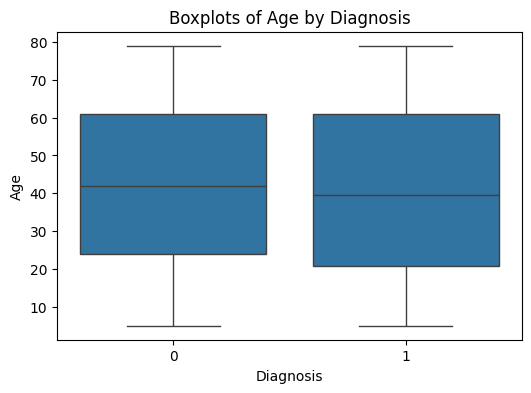

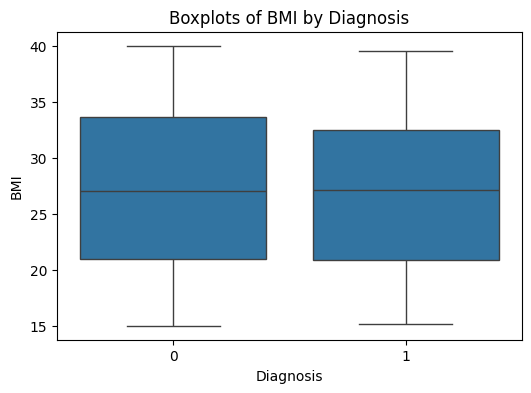

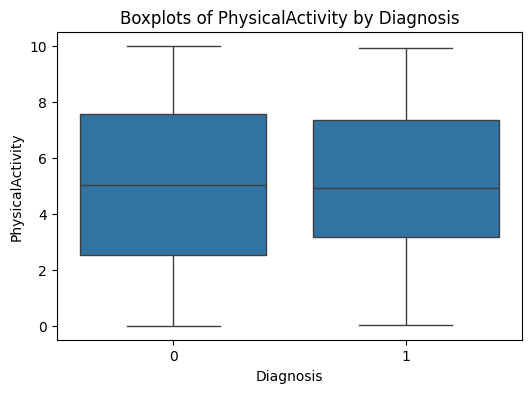

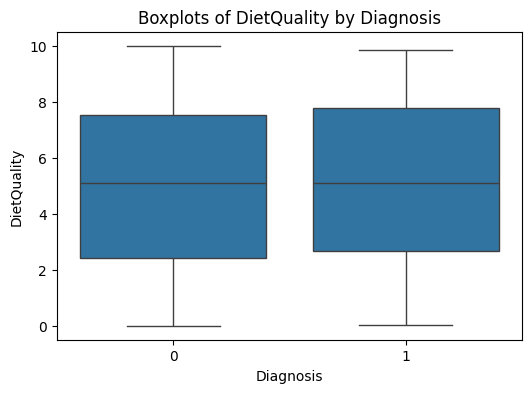

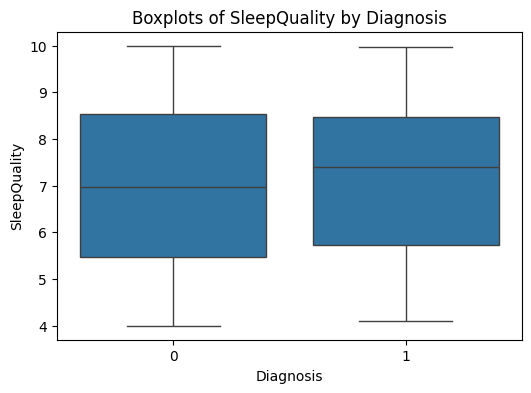

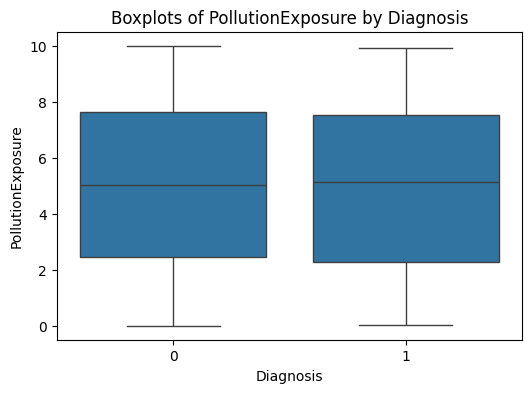

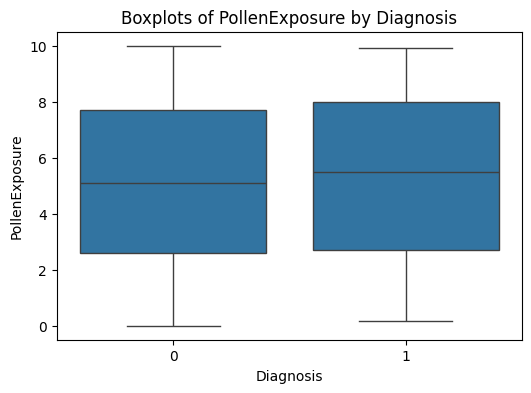

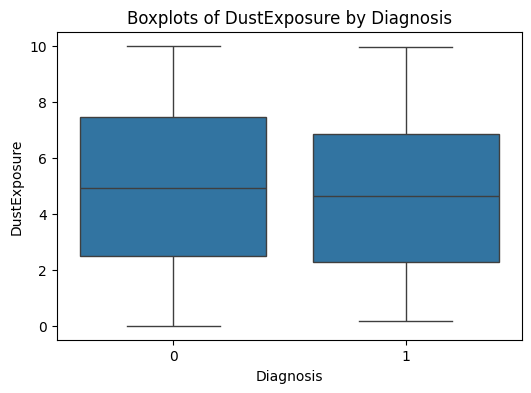

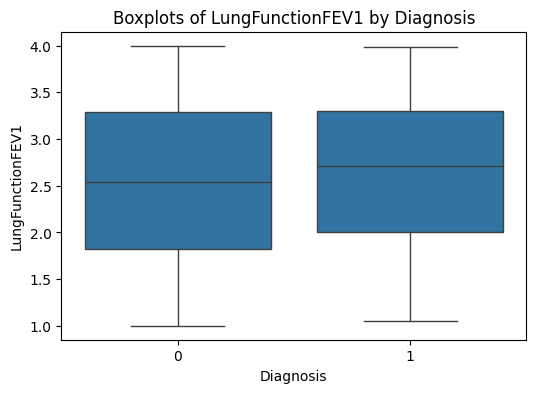

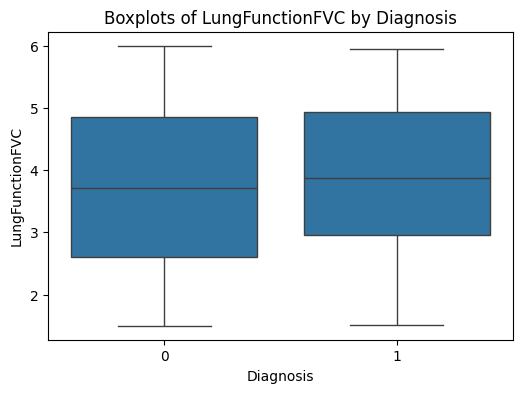

In [24]:
for col in numeric_variables:
    plt.figure(figsize = (6, 4))
    sns.boxplot(x = 'Diagnosis', y = col, data = asthma_dataset)
    plt.title(f"Boxplots of {col} by Diagnosis")
    plt.show()

    By just visually inspecting the relationships, I am not convinced that there is any strong relationship between any of the numeric variables and the target. Potentially the SleepQuality might be somehow associated because the mean/median is different between the two values of the Diagnosis, but this requires further investigation.

#### Feature Standardization

The numeric variables have very different ranges. We can see this from the data set documention as well. For example Age is between 5 and 80, BMI between 15 and 40, but then we also have few variables with values less than 10, etc. Standardization of these features might be useful for the further data modelling.

In [25]:
asthma_dataset[numeric_variables].describe()

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,42.137960,27.244877,5.051786,5.022867,7.019012,5.013030,5.114221,4.981864,2.548564,3.741270
std,21.606655,7.201628,2.903574,2.909980,1.732475,2.935605,2.893088,2.859192,0.861809,1.303689
min,5.000000,15.031803,0.001740,0.003031,4.001437,0.001022,0.000659,0.002434,1.000459,1.500045
25%,23.000000,20.968313,2.578333,2.432043,5.498500,2.432559,2.599996,2.467489,1.824113,2.607489
50%,42.000000,27.052202,5.016881,5.115383,6.975839,5.036519,5.098452,4.903278,2.553244,3.734982
75%,61.000000,33.555903,7.540234,7.544216,8.526950,7.630037,7.708836,7.432218,3.292897,4.864121
max,79.000000,39.985611,9.995809,9.999904,9.996235,9.998964,9.999555,9.999708,3.999719,5.999421


In [37]:
# Apply z-score normalization, i.e. convert each variable into a variable with mean 0 and standard deviation 1.

scaler = StandardScaler()
standardized_data = scaler.fit_transform(asthma_dataset[numeric_variables])
standardized_df = pd.DataFrame(standardized_data, columns=asthma_dataset[numeric_variables].columns)
standardized_df

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
0,0.965740,-1.582769,-1.432099,0.160113,0.971063,0.809355,-0.780866,-1.401921,-1.368934,0.920608
1,-0.747054,-0.623300,0.291269,0.453069,-1.076746,-1.036866,0.810184,0.560684,-0.407132,-1.564256
2,0.687989,-1.229074,0.581330,1.434458,-0.102976,-1.210374,-1.267434,0.162295,-0.987146,0.983019
3,-0.098970,1.565307,-1.256398,0.276233,-1.596880,-1.509757,0.849659,-0.355611,0.561114,-1.105641
4,0.873156,-1.105686,-0.154081,-0.651625,1.504976,-1.373822,-0.713717,1.146977,1.070095,-0.516586
...,...,...,...,...,...,...,...,...,...,...
2387,0.039905,0.252042,-0.699950,0.376978,0.740107,-0.861740,0.760717,-0.544470,0.669296,1.093099
2388,-1.117388,-0.903322,0.259526,-0.218561,0.411163,0.927074,-0.980178,0.519779,-1.642920,1.356614
2389,0.549114,1.365905,-0.109067,1.096868,0.268175,-0.755772,-0.711873,1.574952,-1.001130,-0.302584
2390,0.178780,-0.527792,1.591768,0.804295,-0.174204,1.511361,0.898316,0.024327,1.082816,-1.555908
